# Notebook activity

```{attention}
この講義では、受講者の操作を記録し、授業進行の指標として参照します。
そのためノートブックの最初に次のセルを追加しています。
ノートブックを読み込んだときに、これらのセルが自動実行されるように付加情報を埋め込んでいます。
ひとつ前に行ったセキュリティの設定で、今読み込んだノートブックは "Trusted" 状態になっているはずなので、
改めて初期化用のセルを実行する必要は無いはずです。
```

In [2]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
#%logstop
%logstart -otq $path append

# [python - cannot override sys.excepthook - Stack Overflow](https://stackoverflow.com/questions/1261668/cannot-override-sys-excepthook/28758396)
# https://github.com/ipython/ipython/blob/e6432249582e05f438303ce73d082a0351bb383e/IPython/core/interactiveshell.py#L1952

import sys
import traceback
import IPython

try:
    _showtraceback
except NameError:
    _showtraceback=IPython.core.interactiveshell.InteractiveShell.showtraceback

import logging
logging.basicConfig(filename=path.replace('.log','-exc.log'), format='%(asctime)s %(message)s', level=logging.ERROR, force=True)

import sys
import traceback
import IPython

def showtraceback(self, *args, **kwargs):
    etype, value, tb = self._get_exc_info(kwargs.get('exc_tuple'))
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=kwargs.get('tb_offset'))
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showtraceback(self, *args, **kwargs)

IPython.core.interactiveshell.InteractiveShell.showtraceback = showtraceback

```{attention}
この操作記録を次のように可視化します。
```

In [3]:
import pandas as pd
import numpy as np
import re
ansi_escape = re.compile(r'\x1B(?:[@-Z\\-_]|\[[0-?]*[ -/]*[@-~])')

def activity(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    df = pd.DataFrame()
    try:
        with open(logfile(user), 'r') as f:
            for line in f:
                try:
                    d = dt.strptime(line, "# %a, %d %b %Y %H:%M:%S ")
                    df_new = pd.DataFrame([[1.,1.,1.]], columns = ["y","exc","area"],index=[pd.Timestamp(d)])
                    df = pd.concat([df,pd.DataFrame(df_new)])
                except:
                    pass
    except:
        pass
    try:
        with open(logfile(user).replace('.log','-exc.log'), 'r') as f:
            for line in f:
                try:
                    #print(ansi_escape.sub('', line))
                    d = dt.strptime(ansi_escape.sub('', line), "%Y-%m-%d %H:%M:%S,%f jovyan ")
                    df_new = pd.DataFrame([[1.,0.,5.]], columns = ["y","exc","area"],index=[pd.Timestamp(d)])
                    df = pd.concat([df,pd.DataFrame(df_new)])
                except:
                    pass
    except:
        pass
    return df

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

def plot_ax(ax, user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    data = activity(user).sort_index()
    cmap = plt.cm.Spectral
    plt.scatter(
        x=data.index, y=data['y'].values, 
        c=data['exc'].values, s=data['area'].values*500,
        cmap='Spectral',
        alpha=0.2, edgecolor='none'
    )
    ax.set_ylabel(user, rotation=0, ha="right", va="center")

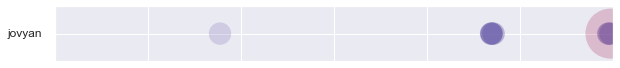

In [6]:
from datetime import date
from datetime import time

fig = plt.figure(figsize=(10,1))
ax = fig.add_subplot(1,1,1)

plt.setp(ax, xlim=(pd.Timestamp(dt.combine(date.today(),time(dt.now().hour,))), pd.Timestamp(dt.combine(date.today(),time(dt.now().hour,59,59)))))
plt.setp(ax, ylim=(0,2))
plt.setp(ax, xticklabels=[])
plt.setp(ax, yticklabels=[])
plot_ax(ax)

In [ ]:
from time import sleep
from IPython import display

In [ ]:
while True:
    try:
        fig = plt.figure(figsize=(10,1))
        ax = fig.add_subplot(1,1,1)
        plt.setp(ax, xlim=(pd.Timestamp(dt.combine(date.today(),time(dt.now().hour,))), pd.Timestamp(dt.combine(date.today(),time(dt.now().hour,59,59)))))
        plt.setp(ax, ylim=(0,2))
        plt.setp(ax, xticklabels=[])
        plt.setp(ax, yticklabels=[])
        plot_ax(ax)
        #print(dt.now())
        display.display(plt.gcf())
        display.clear_output(wait=True)
        sleep(3.0)
    except KeyboardInterrupt:
        break